# Fundamentals Data - Price Prediction Model

This model will take fundamentals data as input, and output a predicted price. In reality we will be predicting market cap; price can be computed by # of outstanding shares.

## Loading fundamentals dataset

In [64]:
# Auto reload local files
%load_ext autoreload
%autoreload 2
# Make files in src/ available to notebook
import sys
if 'src' not in sys.path:
    sys.path.insert(0, 'src')

import datastore as D

import numpy as np
import pandas as pd
import requests
import io

response = requests.get(f'https://www.sec.gov/include/ticker.txt')
companies = pd.read_csv(io.StringIO(response.text), sep='\t')
companies.columns=['ticker', 'sec_id']


def get_ticker(sec_id):
    try:
        return companies[companies["sec_id"] == sec_id].iloc[0]['ticker']
    except:
        return None

df = pd.read_csv('../../data/usfundamentals.com/latest-snapshot-quarterly.csv')
df['symbol'] = df['SEC ID'].apply(get_ticker).str.upper()
df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,SEC ID,Report date,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,ComprehensiveIncomeNetOfTax,EarningsPerShareDiluted,Goodwill,Liabilities,LiabilitiesCurrent,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,NetCashProvidedByUsedInOperatingActivities,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,Revenues,WeightedAverageNumberOfDilutedSharesOutstanding,symbol
0,1329548,2012-09-30,1.506650e+05,1.409890e+05,NaN,NaN,0.03,NaN,9.822009e+06,9.822009e+06,NaN,NaN,NaN,-228319.0,3676.0,3.916620e+05,136278453.0,None
1,1205727,2014-03-31,2.434050e+08,6.298800e+07,26265000.0,NaN,-0.19,19814000.0,NaN,5.969100e+07,-1864000.0,-12929000.0,12179000.0,-5430000.0,152014000.0,1.085370e+08,30586000.0,None
2,1555560,2013-11-30,2.360000e+02,NaN,NaN,NaN,NaN,NaN,3.867000e+03,NaN,3650.0,NaN,-3759.0,NaN,NaN,0.000000e+00,NaN,None
3,1008848,2017-03-31,1.319842e+09,2.481520e+08,133619000.0,-16502000.0,-0.41,278069000.0,6.437150e+08,1.193350e+08,5971000.0,-5849000.0,-25401000.0,-15273000.0,37132000.0,1.193860e+08,45808000.0,ACOR
4,316793,2014-09-28,1.585348e+09,1.069869e+09,658989000.0,-1500000.0,0.36,52149000.0,2.498800e+08,2.224860e+08,1243000.0,8030000.0,65151000.0,17959000.0,377687000.0,2.869880e+08,72973000.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10901,29669,2017-03-31,3.907300e+09,2.138000e+09,244300000.0,-72900000.0,-0.71,603100000.0,4.081400e+09,1.412300e+09,-151400000.0,95500000.0,-18600000.0,47400000.0,637000000.0,1.676300e+09,70100000.0,None
10902,1543637,2017-03-31,3.497480e+05,3.284530e+05,317547.0,NaN,0.05,NaN,NaN,3.863980e+05,379000.0,0.0,-73903.0,-69726.0,21295.0,0.000000e+00,75341244.0,NUMD
10903,1047881,2017-03-31,2.025767e+07,9.547806e+06,2653868.0,7480.0,0.00,NaN,1.273629e+07,8.481404e+06,-5762.0,-48563.0,-2215649.0,181859.0,857141.0,1.111753e+07,92931260.0,None
10904,1546296,2017-03-31,3.996409e+07,9.309830e+06,5562237.0,-3101693.0,NaN,20201190.0,1.095365e+07,7.881902e+06,2856000.0,-6876.0,-3355748.0,-3691394.0,276019.0,5.634481e+06,NaN,IPDN


## Download market cap data

Store in DB.

In [50]:
symbols = list(set(df['symbol'].tolist()))
#D.download_company_profiles(symbols)
data = D.get_company_profiles(symbols)
company_profiles = data
company_profiles

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret = ret.append(row, ignore_index=True)
/home/jared/workspace/market-diff/notebooks/stock-prediction/src/datastore.py:134: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ret =

,_id,country,currency,exchange,finnhubIndustry,ipo,logo,marketCapitalization,name,phone,shareOutstanding,ticker,weburl,date
0,62bd0cdeb95810b876129252,US,USD,"NEW YORK STOCK EXCHANGE, INC.",,2017-01-20,https://static.finnhub.io/logo/9e05088cd966e48...,2396.432868,Nextier Oilfield Solutions Inc,17133256000.0,244.036000,NEX,https://nextierofs.com/contact-us/,2022-06-29 19:39:26.913
1,62bd0556b95810b876128b89,US,USD,NASDAQ NMS - GLOBAL MARKET,"Textiles, Apparel & Luxury Goods",2006-02-08,https://static.finnhub.io/logo/fa321076fc85e7b...,2988.245226,Crocs Inc,13038487000.0,61.575200,CROX,https://careers.crocs.com/,2022-06-29 19:07:18.047
2,62bd05e3b95810b876128c2e,US,USD,"NEW YORK STOCK EXCHANGE, INC.",Media,2017-03-02,https://static2.finnhub.io/file/publicdatany/f...,22843.088103,Snap Inc,13103993339.0,1636.323579,SNAP,https://www.snap.com/,2022-06-29 19:09:39.165
3,62bd037fb95810b8761289fb,US,USD,"NEW YORK STOCK EXCHANGE, INC.","Textiles, Apparel & Luxury Goods",1993-09-30,https://static.finnhub.io/logo/2d9d8282-80ec-1...,500.034772,Movado Group Inc,12012678000.0,22.556710,MOV,https://www.movadogroup.com/,2022-06-29 18:59:27.613
4,62bd06a9b95810b876128ccf,IL,USD,OTC MARKETS,Technology,1999-01-01,https://static.finnhub.io/logo/5df8c15a-80fa-1...,4.470748,On Track Innovations Ltd,97246868000.0,75.775400,OTIVF,https://www.otiglobal.com,2022-06-29 19:12:57.119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4003,62bd07afb95810b876128da6,US,USD,"NEW YORK STOCK EXCHANGE, INC.",Technology,1981-01-01,,205.131024,CoreCard Corp,14043812900.0,8.618950,CCRD,http://www.intelsys.com/,2022-06-29 19:17:19.796
4004,62bd0667b95810b876128c9f,US,USD,NASDAQ NMS - GLOBAL MARKET,Biotechnology,2004-05-27,https://static.finnhub.io/logo/2d87da57d47f7a5...,2295.525382,ACADIA Pharmaceuticals Inc,18585582871.0,161.429000,ACAD,http://www.acadia-pharm.com/,2022-06-29 19:11:51.663
4005,62bd0230b95810b8761288c4,US,USD,NYSE MKT LLC,Metals & Mining,1972-03-15,https://static.finnhub.io/logo/2db75e0a-826a-1...,58.138955,Friedman Industries Inc,17136729433.0,6.856010,FRD,http://www.friedmanindustries.com/,2022-06-29 18:53:52.423
4006,62bd0a8cb95810b87612905f,US,USD,"NEW YORK STOCK EXCHANGE, INC.",Banking,1969-03-05,https://static.finnhub.io/logo/0bf9570a-80ec-1...,338641.926037,JPMorgan Chase & Co,12122706000.0,2937.050000,JPM,https://www.jpmorganchase.com/,2022-06-29 19:29:32.535


## Pull market cap data and fundamental data into a single dataframe

In [40]:
data = df[~df["symbol"].isnull()]

def get_market_cap(ticker):
    cap = company_profiles[company_profiles.ticker == ticker]['marketCapitalization']
    if cap is float:
        return cap
    elif cap.shape[0] > 0:
        return cap.iloc[0]
    else:
        return None

# Add labels
label_key = 'market_cap'
data['market_cap'] = data['symbol'].apply(get_market_cap)
"""
#latest_prices = D.get_latest_price(df.symbol)
for ticker in latest_prices:
    #data.loc[data.symbol == ticker, 'price'] = latest_prices[ticker]['close']
    print(data.loc[data.symbol == ticker, 'market_cap'])
    data.loc[data.symbol == ticker, 'market_cap'] = company_profiles[company_profiles.ticker == ticker]['marketCapitalization']
"""
    
data[~data[label_key].isnull()]

,SEC ID,Report date,Assets,AssetsCurrent,CashAndCashEquivalentsAtCarryingValue,ComprehensiveIncomeNetOfTax,EarningsPerShareDiluted,Goodwill,Liabilities,LiabilitiesCurrent,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,NetCashProvidedByUsedInOperatingActivities,OperatingIncomeLoss,PropertyPlantAndEquipmentNet,Revenues,WeightedAverageNumberOfDilutedSharesOutstanding,symbol,market_cap
3,1008848,2017-03-31,1.319842e+09,2.481520e+08,1.336190e+08,-16502000.0,-0.41,2.780690e+08,6.437150e+08,1.193350e+08,5971000.0,-5849000.0,-25401000.0,-15273000.0,37132000.0,119386000.0,45808000.0,ACOR,5.936022
5,820313,2017-03-31,8.707400e+09,3.722400e+09,1.242900e+09,291600000.0,0.71,3.748700e+09,4.956300e+09,1.583300e+09,-53700000.0,8900000.0,237800000.0,314100000.0,726900000.0,NaN,316400000.0,APH,38437.805247
7,1590364,2017-03-31,1.759098e+09,NaN,2.212220e+08,445000.0,NaN,1.165840e+08,6.225370e+08,NaN,214287000.0,-78800000.0,17680000.0,NaN,363775000.0,44673000.0,75762283.0,FTAI,1862.763654
10,1010086,2017-03-31,1.608205e+08,6.517265e+07,3.010357e+07,NaN,NaN,8.983340e+05,4.569592e+08,1.256106e+07,-193052.0,0.0,1594802.0,-4269170.0,263302.0,NaN,NaN,SIGA,807.334256
12,1084384,2017-03-31,1.310108e+07,3.857721e+06,1.409077e+06,-1319960.0,-0.14,NaN,1.633836e+07,1.257149e+07,1631274.0,-30924.0,-1238056.0,-1989541.0,8093252.0,2794943.0,9322228.0,TEUM,0.040000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10895,1489300,2017-04-30,0.000000e+00,NaN,NaN,NaN,NaN,NaN,1.498380e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZLME,0.000000
10897,1570937,2016-12-31,5.900490e+05,3.004900e+04,3.004900e+04,NaN,NaN,NaN,5.666820e+05,5.666820e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATAO,10.993468
10898,1437352,2017-03-31,1.139590e+08,6.040000e+07,3.967900e+07,-6161000.0,-0.23,3.093200e+07,7.593400e+07,7.399700e+07,568000.0,-22945000.0,1459000.0,-6193000.0,2687000.0,22844000.0,27170827.0,EVBG,1168.029460
10900,1372020,2017-03-31,8.776270e+08,2.921210e+08,6.895000e+06,-17550000.0,-0.27,NaN,6.460990e+08,1.797530e+08,10942000.0,-10152000.0,-5060000.0,-624000.0,419268000.0,170586000.0,61065000.0,GLDD,868.760310


## Data Cleaning

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Drop any rows with null/nan/None
data_notnull = data.dropna()

# Split into X, y; scale
metadata_columns = ['SEC ID', 'Report date', 'symbol']
features = data_notnull[[c for c in data.columns if c != label_key and c not in metadata_columns]]
labels = data_notnull[label_key]
X_scaler = StandardScaler()
X = X_scaler.fit_transform(features)
y_scaler = StandardScaler()
y = y_scaler.fit_transform(labels.to_numpy().reshape(-1, 1))[:, 0]
# Split into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape

(261, 15)

## Model Train and Eval

RMSE: 0.40662564470428986
RMSE (scaled): [[66639.11149918]]
Mean - labels: 20531.648912561992, y_test: 16243.308591637773


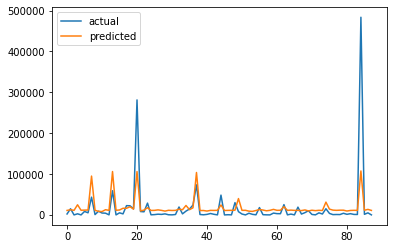

In [63]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt

model = RandomForestRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = np.mean(np.square(y_pred - y_test))

print('RMSE:', np.sqrt(mse))
print('RMSE (scaled):', y_scaler.inverse_transform(np.array([[np.sqrt(mse)]])))
print(f'Mean - labels: {np.mean(labels.to_numpy())}, y_test: {np.mean(y_scaler.inverse_transform(y_test.reshape(-1, 1)))}')

plt.plot(np.arange(X_test.shape[0]), y_scaler.inverse_transform(y_test.reshape(-1, 1)), label="actual")
plt.plot(np.arange(X_test.shape[0]), y_scaler.inverse_transform(y_pred.reshape(-1, 1)), label="predicted")
plt.legend()
plt.show()

In [60]:
#!pipenv install xgboost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

data_dmatrix = xgb.DMatrix(data=X, label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
print(cv_results)

xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xg_reg

[21:20:36] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.482287
[21:20:36] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:36] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[21:20:36] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0          1.039463        0.273912        0.983011       0.468799
1          0.997844        0.274247        0.946260       0.482105
2          0.961496        0.274135        0.916407       0.493586
3          0.930066        0.272364        0.892440       0.503071
4          0.900815        0.271343        0.873602       0.509816
5          0.875148        0.270273        0.857056       0.515954
6          0.852261        0.268715     

In [ ]:
def predict_market_cap(ticker):
    data_notnull[data_notnull['']]
    return model.predict()